# Manifold Learning Challenges

In this assignment we will analyze the "swiss roll" dataset available from scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html#sklearn.datasets.make_swiss_roll

Let's create the data and visualize it:

In [ ]:
# Common imports
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

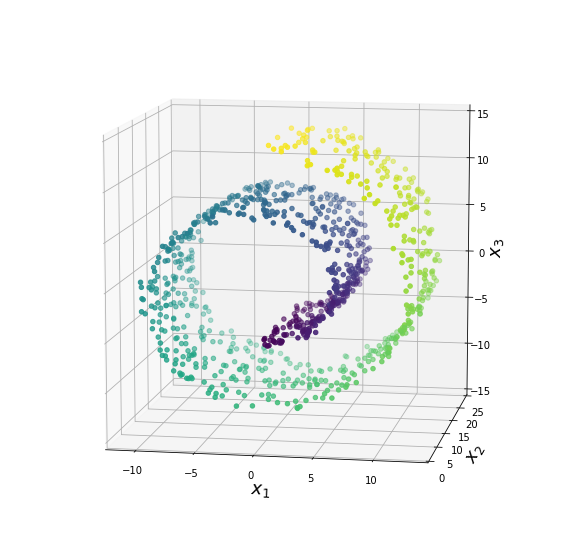

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 10))
ax=plt.axes(projection='3d')

from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap='viridis')

# You can play with the elevation and azimuth parameters to get a better view
ax.view_init(10, -80) 

ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(-12,14)
ax.set_ylim(0,25)
ax.set_zlim(-15,15)

plt.show()

We see that the swiss roll is a flat sheet which is first aligned along $x_2$ and then folded in the $(x_1,x_3)$ plane into a spiral which is parametrized by the parameter $t$ (used to color code the points in the scatter plot).

Our goal will be to "unroll" the swiss roll onto two dimensions using different manifold learning methods. The ideal case is when we unroll in the $(t,x_2)$ plane as we did in class: 

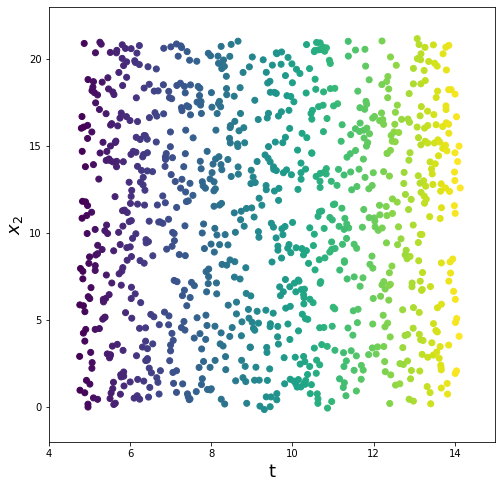

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(t, X[:, 1], c=t, cmap='viridis')
plt.xlim(4,15)
plt.ylim(-2, 23)
plt.xlabel('t', fontsize=18)
plt.ylabel('$x_2$', fontsize=18)
plt.show()

But this is cheating, because it uses the parametrization of the dataset, which is a priori unknown. Instead, let's try a few other, more honest, methods from scikit-learn:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold

**For better visualization, continue to color-code the points by their $t$ values.**

## Challenge 1: Multi-dimensional scaling

Use the method of **Multidimensional Scaling (MDS)** discussed in class to project the swiss roll onto two dimensions, then make a 2D scatter plot in analogy to the one above.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html?highlight=multidimensional%20scaling

In [ ]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
mds_X = mds.fit_transform(X)
mds_X.shape

(1000, 2)

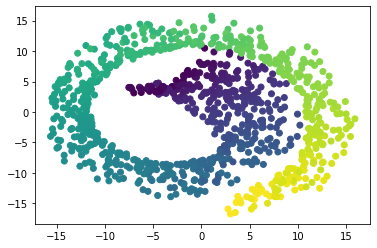

In [ ]:
plt.scatter(mds_X[:,0], mds_X[:,1],c=t,cmap='viridis')

## Challenge 2: Locally linear embedding

Use the method of **Locally Linear Embedding (LLE)** to project the swiss roll onto two dimensions, then make a 2D scatter plot.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html?highlight=lle

Try playing with the default values of the hyperparameters - you should eventually be able to unroll almost perfectly as in the cheater plot above. 

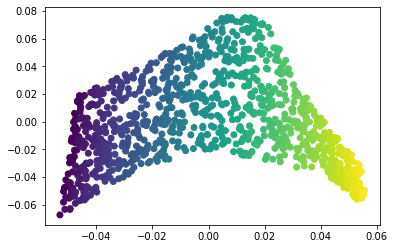

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors = 11, n_components=2)
lle_X = lle.fit_transform(X)
lle_X.shape
plt.scatter(lle_X[:,0], lle_X[:,1],c=t,cmap='viridis')

## Challenge 3: Isomap

Use the **Isomap** method to project the swiss roll onto two dimensions, then make a 2D scatter plot.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap

In [ ]:
from sklearn.manifold import Isomap
map = Isomap(n_components=2)
iso_X = map.fit_transform(X)
iso_X.shape


(1000, 2)

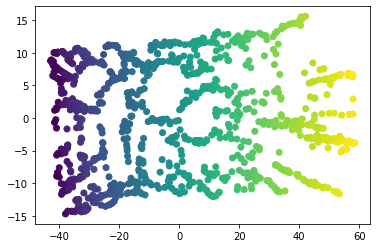

In [ ]:
plt.scatter(iso_X[:,0], iso_X[:,1],c=t,cmap='viridis')